In [ ]:
import pandas as pd
import numpy as np
from plotutils import *
np.seterr(all='raise')

# logit

In [2]:
logdir='../IPG/test/log'; date='04_23_2021'; solver='naive'; loss='logit'; lam_shrink=[0.1, 0.01]; percent=[0.1, 0.2];

In [6]:
algo_df_dict_naive_adaptive = get_all_adaptive(logdir, date, loss, lam_shrink, percent, ts=[1e-12])
ppf = PerformanceProfile(algo_df_dict_naive_adaptive)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
naive_adaptive_best = 'naive-1e-12-none-inf'
print('Best params:', naive_adaptive_best)

naive-1e-12-none-inf
 44/44 instances terminate with status:  0
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 33 instances are kept.
Best params: naive-1e-12-none-inf


In [9]:
algo_df_dict_negT = get_all_adaptive(logdir, date, loss, lam_shrink, percent, ts=[-0.999], solver = 'negT')
ppf = PerformanceProfile(algo_df_dict_negT)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
negT_best = 'negT--0.999-none-inf'
print('Best params:', negT_best)

negT--0.999-none-inf
 44/44 instances terminate with status:  0
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 25 instances are kept.
Best params: negT--0.999-none-inf


In [10]:
algo_df_dict_schimdt = get_all_schimdt(logdir, date, loss, lam_shrink, percent, schimdt_consts=[1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e11])
ppf = PerformanceProfile(algo_df_dict_schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', plot=False,show_num=True, options={'ratio_max':4})
print("=================")
schimdt_best = get_best(pools)
print('Best params:', schimdt_best)

schimdt-none-0.1
 37/44 instances terminate with status:  0
  7/44 instances terminate with status:  2
schimdt-none-1.0
 41/44 instances terminate with status:  0
  3/44 instances terminate with status:  2
schimdt-none-10.0
 43/44 instances terminate with status:  0
  1/44 instances terminate with status:  2
schimdt-none-100.0
 44/44 instances terminate with status:  0
schimdt-none-1000.0
 44/44 instances terminate with status:  0
schimdt-none-10000.0
 44/44 instances terminate with status:  0
schimdt-none-100000.0
 44/44 instances terminate with status:  0
schimdt-none-1000000.0
 44/44 instances terminate with status:  0
schimdt-none-100000000000.0
 40/44 instances terminate with status:  0
  3/44 instances terminate with status:  1
  1/44 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 38 instances are kept.
Best params: schimdt-none-100000.0


## adaptive

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 35 instances are kept.


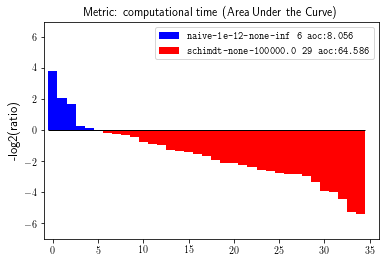

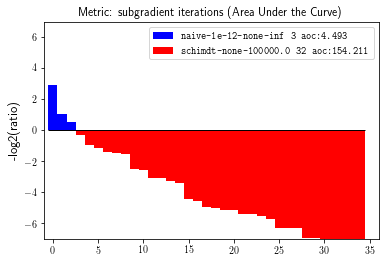

In [13]:
final = {}; target = naive_adaptive_best; df= algo_df_dict_naive_adaptive
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})
_ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':7})

# negT

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 29 instances are kept.


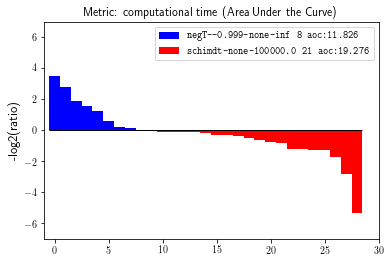

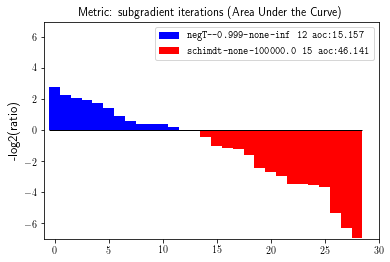

In [14]:
final = {}; target = negT_best; df= algo_df_dict_negT
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})
_ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':7})

## negT vs adaptive

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 33 instances are kept.


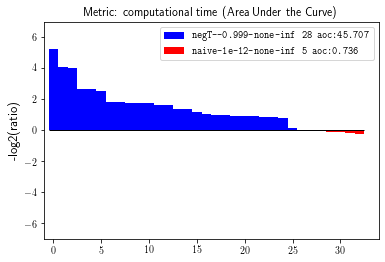

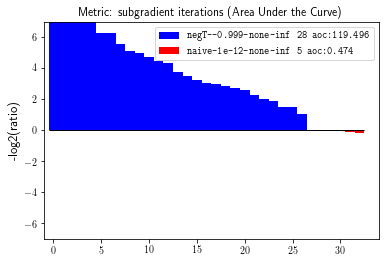

In [15]:
final = {}; target = negT_best; df= algo_df_dict_negT
final[target] = df[target]
final[naive_adaptive_best] = algo_df_dict_naive_adaptive[naive_adaptive_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})
_ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':7})

In [23]:
pd.merge(algo_df_dict_negT['negT--0.999-none-inf'][['datasetid','subgrad_iters','time','F']], 
         algo_df_dict_naive_adaptive['naive-1e-12-none-inf'][['datasetid','subgrad_iters','time', 'F']], 
         on='datasetid', suffixes={"_NegT", "_adaptive"}).head(20)

,datasetid,subgrad_iters_NegT,time_NegT,F_NegT,subgrad_iters_adaptive,time_adaptive,F_adaptive
0,a9a_0.1_0.1,37106,10.623552,0.513369,103130,19.990296,0.513365
1,australian_0.1_0.1,1,0.002525,0.693147,29,0.005830,0.693147
2,breast_cancer_0.1_0.1,99,0.302443,0.308762,7627,1.027380,0.308760
3,german_numer_0.1_0.1,69,0.226475,0.558028,508,0.285518,0.558027
4,ijcnn1_0.1_0.1,39135,5.684505,0.379731,79510,10.165502,0.379732
5,ionosphere_0.1_0.1,149,0.453109,0.528968,3547,0.797920,0.528966
6,mushrooms_0.1_0.1,20793,6.026662,0.278316,134327,20.041394,0.278282
7,sonar_0.1_0.1,196,0.612276,0.500228,1647,1.210379,0.500224
8,splice_0.1_0.1,1552,0.286670,0.558184,1380,0.229349,0.558184
9,svmguide3_0.1_0.1,45072,5.013517,0.591144,42923,4.544519,0.591144


### sensitivity analysis

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 36 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 31 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 28 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 28 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 28 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 27 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 29 instances are kept.
All algorithms failed in 0 instances
Metrics for failed

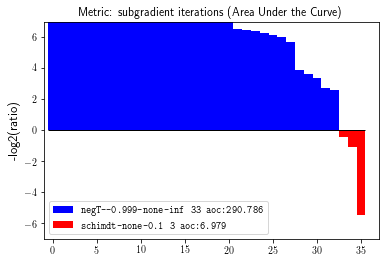

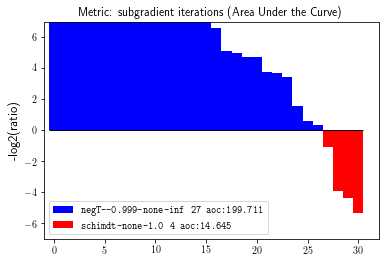

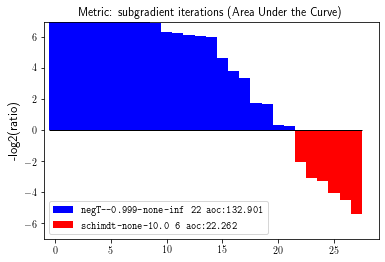

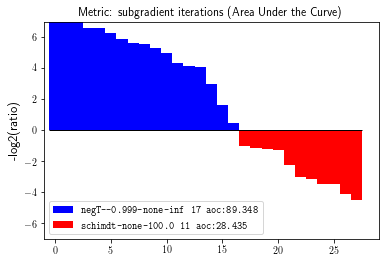

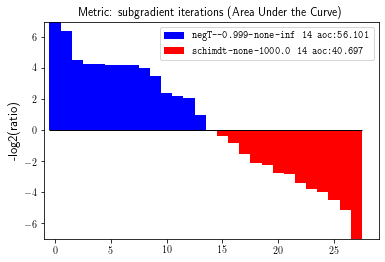

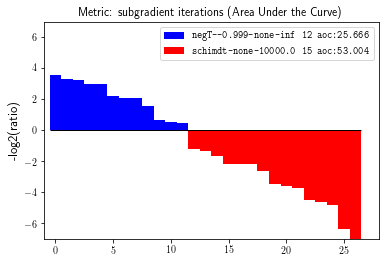

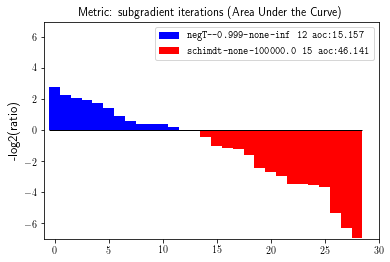

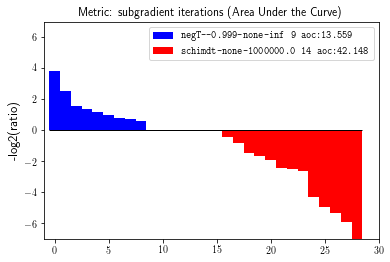

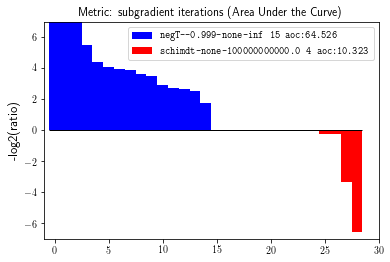

In [24]:
for c in [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e11]:
    final = {}; target = negT_best; df= algo_df_dict_negT
    final[target] = df[target]
    schimdt_cheat = f'schimdt-none-{c}'
    final[schimdt_cheat] = algo_df_dict_schimdt[schimdt_cheat]
    ppf = PerformanceProfile(final)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':7})

## ls

In [3]:
logdir='../IPG/test/log'; date='04_23_2021'; solver='naive'; loss='ls'; lam_shrink=[0.1, 0.01]; percent=[0.1, 0.2];

In [4]:
algo_df_dict_naive_adaptive = get_all_adaptive(logdir, date, loss, lam_shrink, percent, ts=[1e-12], excludes=['YearPredictionMSD'])
ppf = PerformanceProfile(algo_df_dict_naive_adaptive)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
naive_adaptive_best = 'naive-1e-12-none-inf'
print('Best params:', naive_adaptive_best)

naive-1e-12-none-inf
 30/32 instances terminate with status:  0
  2/32 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 13 instances are kept.
Best params: naive-1e-12-none-inf


In [5]:
algo_df_dict_negT = get_all_adaptive(logdir, date, loss, lam_shrink, percent, ts=[-0.999], solver = 'negT', excludes=['YearPredictionMSD'])
ppf = PerformanceProfile(algo_df_dict_negT)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
negT_best = 'negT--0.999-none-inf'
print('Best params:', negT_best)

negT--0.999-none-inf
 30/32 instances terminate with status:  0
  2/32 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 14 instances are kept.
Best params: negT--0.999-none-inf


In [6]:
algo_df_dict_schimdt = get_all_schimdt(logdir, date, loss, lam_shrink, percent, schimdt_consts=[1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e11], excludes=['YearPredictionMSD'])
ppf = PerformanceProfile(algo_df_dict_schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', plot=False,show_num=True, options={'ratio_max':4})
print("=================")
schimdt_best = get_best(pools)
print('Best params:', schimdt_best)

schimdt-none-0.1
 26/32 instances terminate with status:  0
  4/32 instances terminate with status: -2
  2/32 instances terminate with status:  2
schimdt-none-1.0
 26/32 instances terminate with status:  0
  4/32 instances terminate with status: -2
  2/32 instances terminate with status:  2
schimdt-none-10.0
 26/32 instances terminate with status:  0
  4/32 instances terminate with status: -2
  2/32 instances terminate with status:  2
schimdt-none-100.0
 26/32 instances terminate with status:  0
  4/32 instances terminate with status: -2
  2/32 instances terminate with status:  2
schimdt-none-1000.0
 30/32 instances terminate with status:  0
  2/32 instances terminate with status: -2
schimdt-none-10000.0
 30/32 instances terminate with status:  0
  2/32 instances terminate with status: -2
schimdt-none-100000.0
 30/32 instances terminate with status:  0
  2/32 instances terminate with status: -2
schimdt-none-1000000.0
 30/32 instances terminate with status:  0
  2/32 instances terminate

## adpative

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.


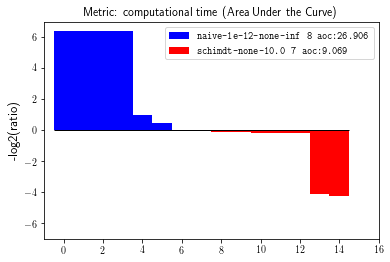

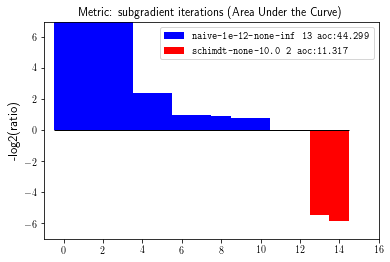

In [7]:
final = {}; target = naive_adaptive_best; df= algo_df_dict_naive_adaptive
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})
_ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':7})

## negT

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.


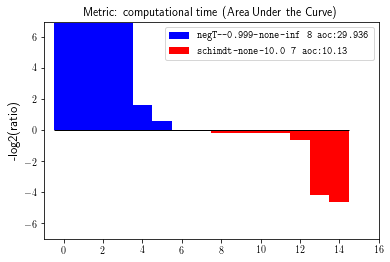

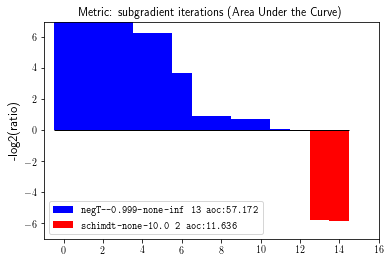

In [8]:
final = {}; target = negT_best; df= algo_df_dict_negT
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})
_ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':7})

## sensitivity analysis

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 20 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 14 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 16 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 17 instances are kept.
All algorithms failed in 0 instances
Metrics for failed

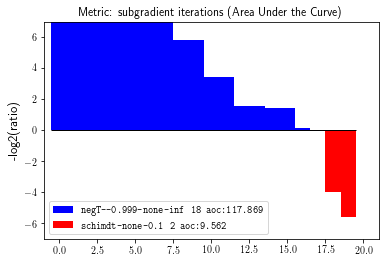

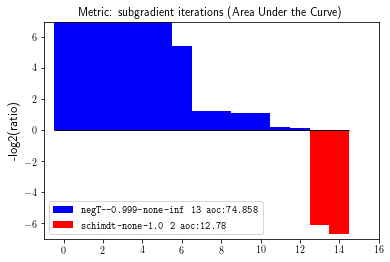

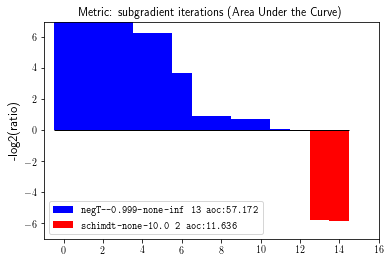

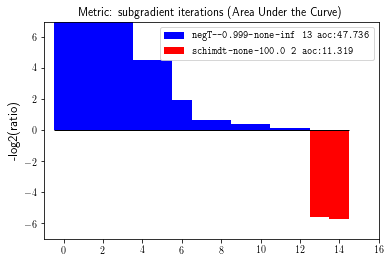

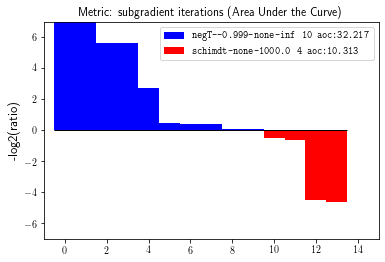

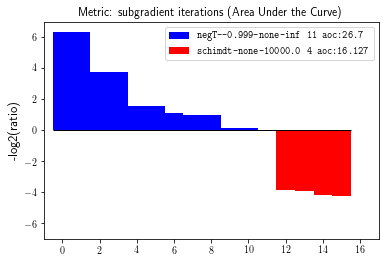

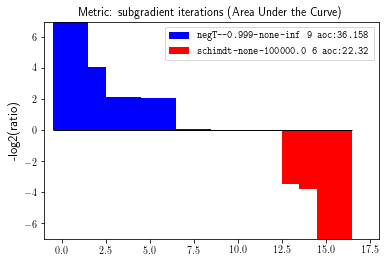

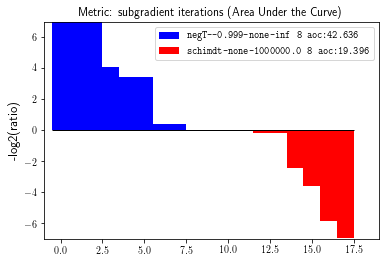

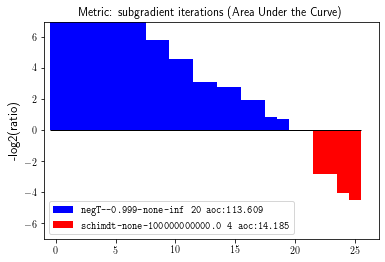

In [9]:
for c in [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e11]:
    final = {}; target = negT_best; df= algo_df_dict_negT
    final[target] = df[target]
    schimdt_cheat = f'schimdt-none-{c}'
    final[schimdt_cheat] = algo_df_dict_schimdt[schimdt_cheat]
    ppf = PerformanceProfile(final)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':7})